[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Figure 8.12 and Example 12.17 

Analysis of unemployment in Spain as a function of temperature and tourists, showing that although temperature and unemployment are correlated, this is due to the confounding effect of the number of tourists\
Topics: Correlation and causation, confounder, causal inference, linear regression, adjusting for confounding factors

Author: Carlos Fernandez-Granda\
Data sources: https://www.sepe.es/HomeSepe https://www.ine.es/ https://www.noaa.gov/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import datetime
import math

font_size = 15
font_size_ticks = 15

data_all = pd.read_csv ("../data/unemployment_spain.csv")
data = data_all[data_all["Tourists"]>0]
print(data.columns)
temperature = data["Temperature"].values
tourists = data["Tourists"].values/1e6
unemployment = data['Unemployment'].values/1e6

tmin = np.min(temperature)-2
tmax = np.max(temperature)+2
t = np.linspace(tmin, tmax, 200)
umin = np.min(unemployment)
umax = np.max(unemployment)

Index(['Temperature', 'Tourists', 'Unemployment'], dtype='object')


In [2]:
# Correlation between temperature, tourists and unemployment
data.corr()

,Temperature,Tourists,Unemployment
Temperature,1.000000,0.602374,-0.205447
Tourists,0.602374,1.000000,-0.346758
Unemployment,-0.205447,-0.346758,1.000000


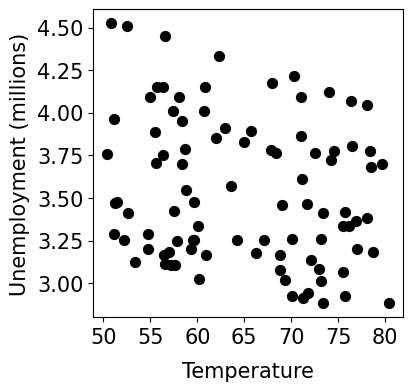

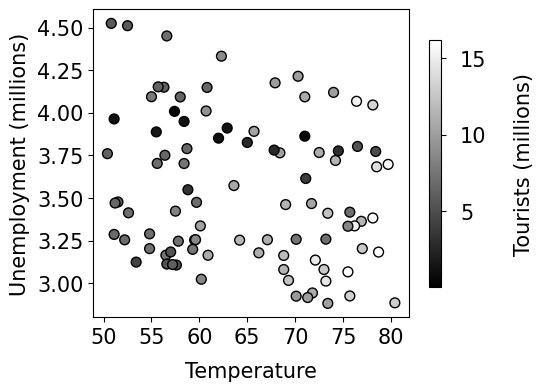

In [3]:
markersize = 50
fig = plt.figure(figsize = (4,4)) 
plt.scatter(temperature,unemployment,c="black",s=markersize,edgecolors='black',rasterized=True)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel('Temperature',fontsize=font_size,labelpad = 10)
plt.ylabel('Unemployment (millions)',fontsize=font_size,labelpad = 5)

fig = plt.figure(figsize = (5.1,4)) 
im =plt.scatter(temperature,unemployment,c=tourists,s=markersize,cmap="gray",edgecolors='black',rasterized=True)
cbar = plt.colorbar(im,shrink=0.8)
cbar.ax.tick_params(labelsize=font_size_ticks,pad = 10)
cbar.set_label(label='Tourists (millions)',fontsize=font_size,labelpad = 20)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel('Temperature',fontsize=font_size,labelpad = 10)
plt.ylabel('Unemployment (millions)',fontsize=font_size,labelpad = 5);

Coefficient: -0.01
Intercept: 4.18
Coefficient of determination 0.042


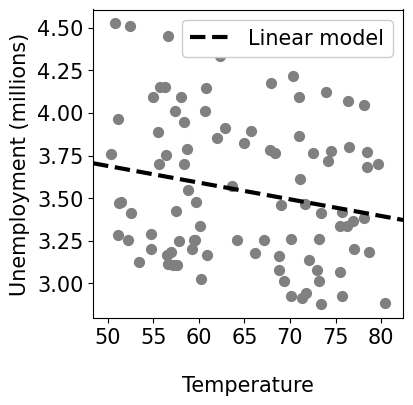

In [4]:
# Short regression model of unemployment given temperature
rho_temperature_unemployment = np.corrcoef(temperature,unemployment)[0,1]
linear_coefficient = np.std(unemployment)*rho_temperature_unemployment / np.std(temperature)
intercept = np.mean(unemployment)-np.std(unemployment)*rho_temperature_unemployment*np.mean(temperature) / np.std(temperature)

X_temp = np.array([temperature]).T
linear_model_just_temp = LinearRegression().fit(X_temp, unemployment)
print("Coefficient: " + str(round(linear_model_just_temp.coef_[0],3)))
print("Intercept: " + str(round(linear_model_just_temp.intercept_,2)))
print("Coefficient of determination", round(linear_model_just_temp.score(X_temp,unemployment),3))
linear_model = linear_model_just_temp.coef_[0] * t + linear_model_just_temp.intercept_

plt.figure(figsize=(4,4))
plt.scatter(temperature,unemployment,s=markersize,color="gray",rasterized=True)
plt.plot(t,linear_model ,lw=3,
         color="black",ls="dashed",label="Linear model")
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlim([tmin,tmax])
plt.xlabel('Temperature',fontsize=font_size,labelpad = 20)
plt.ylabel('Unemployment (millions)',fontsize=font_size,labelpad = 5)
plt.legend(fontsize=font_size,framealpha=1);

In [5]:
# Short regression model of unemployment given tourists
X_tour = np.array([tourists]).T
linear_model_just_tour = LinearRegression().fit(X_tour, unemployment)
print("Coefficient: " + str(round(linear_model_just_tour.coef_[0],3)))
print("Intercept: " + str(round(linear_model_just_tour.intercept_,3)))
print("Coefficient of determination", round(linear_model_just_tour.score(X_tour,unemployment),5))

Coefficient: -0.038
Intercept: 3.859
Coefficient of determination 0.12024


In [6]:
# Long regression model of unemployment given temperature and tourists
X = np.array([[temperature,tourists]])[0].T
linear_model_both = LinearRegression().fit(X, unemployment)
print("Coefficient for temperature: " + str(round(linear_model_both.coef_[0],5)))
print("Coefficient for tourists: " + str(round(linear_model_both.coef_[1],3)))
print("Intercept: " + str(round(linear_model_both.intercept_,3)))
print("Coefficient of determination", round(linear_model_both.score(X,unemployment),5))

Coefficient for temperature: 0.00026
Coefficient for tourists: -0.038
Intercept: 3.845
Coefficient of determination 0.12026


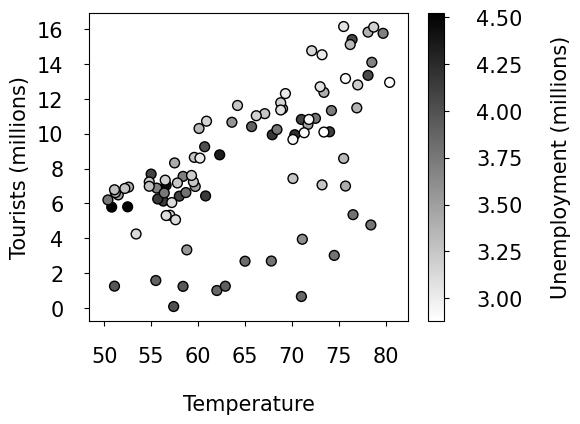

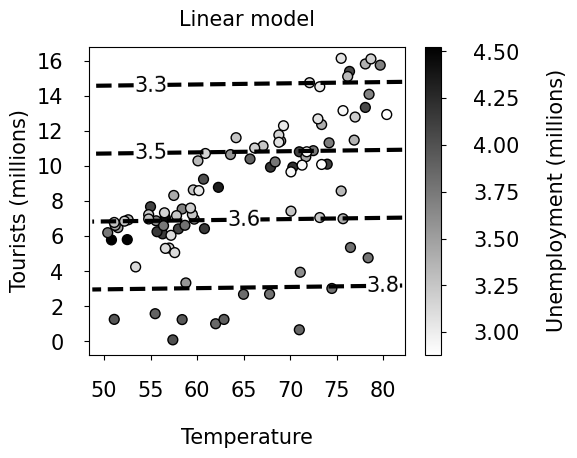

In [7]:
min_tourists = 0
max_tourists = 17
temperature_pred = np.linspace(tmin, tmax, 50)   
tourists_pred = np.linspace(min_tourists, max_tourists, 50)  

aux_temperature, aux_tourists = np.meshgrid(temperature_pred, tourists_pred)
model_input = np.array([aux_temperature.flatten(), aux_tourists.flatten()]).T

prediction = linear_model_both.predict(model_input)
reshaped_prediction = prediction.reshape(aux_temperature.shape)

v_max = np.max(unemployment)
v_min = np.min(unemployment)

fig = plt.figure(figsize = (5.15,4)) 
sc = plt.scatter(temperature,tourists,c=unemployment,s=markersize,cmap="gray_r",edgecolor='black',vmax = v_max,vmin = v_min,
            rasterized=True)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlim([tmin,tmax])
ax = plt.gca()
ax.tick_params(axis='both', which='major', pad=15)
cbar = plt.colorbar(sc,shrink=1)
cbar.ax.tick_params(labelsize=font_size_ticks,pad = 20)
cbar.set_label(label='Unemployment (millions)',fontsize=font_size,labelpad = 20)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel('Temperature',fontsize=font_size,labelpad = 20)
plt.ylabel('Tourists (millions)',fontsize=font_size,labelpad = 5)
plt.show()

fig = plt.figure(figsize = (5.1,4)) 
sc = plt.scatter(temperature,tourists,c=unemployment,s=markersize,cmap="gray_r",edgecolor='black',vmax = v_max,vmin = v_min,
            rasterized=True)
CS = plt.contour(reshaped_prediction,colors="black", extent=[tmin, tmax,min_tourists,max_tourists], 
                origin='lower',linewidths=3,linestyles="dashed",levels=4)
manual_locations = [(55, 15), (55, 10.5), (65, 6.7), (80, 3)]
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt = '%1.1f',manual =manual_locations)#,ticks=Contourrange)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlim([tmin,tmax])
ax = plt.gca()
ax.tick_params(axis='both', which='major', pad=15)
cbar = plt.colorbar(sc,shrink=1)
cbar.ax.tick_params(labelsize=font_size_ticks,pad = 20)
cbar.set_label(label='Unemployment (millions)',fontsize=font_size,labelpad = 20)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel('Temperature',fontsize=font_size,labelpad = 20)
plt.ylabel('Tourists (millions)',fontsize=font_size,labelpad = 5)
plt.title('Linear model',fontsize=font_size,pad = 15);